<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Gold_decomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

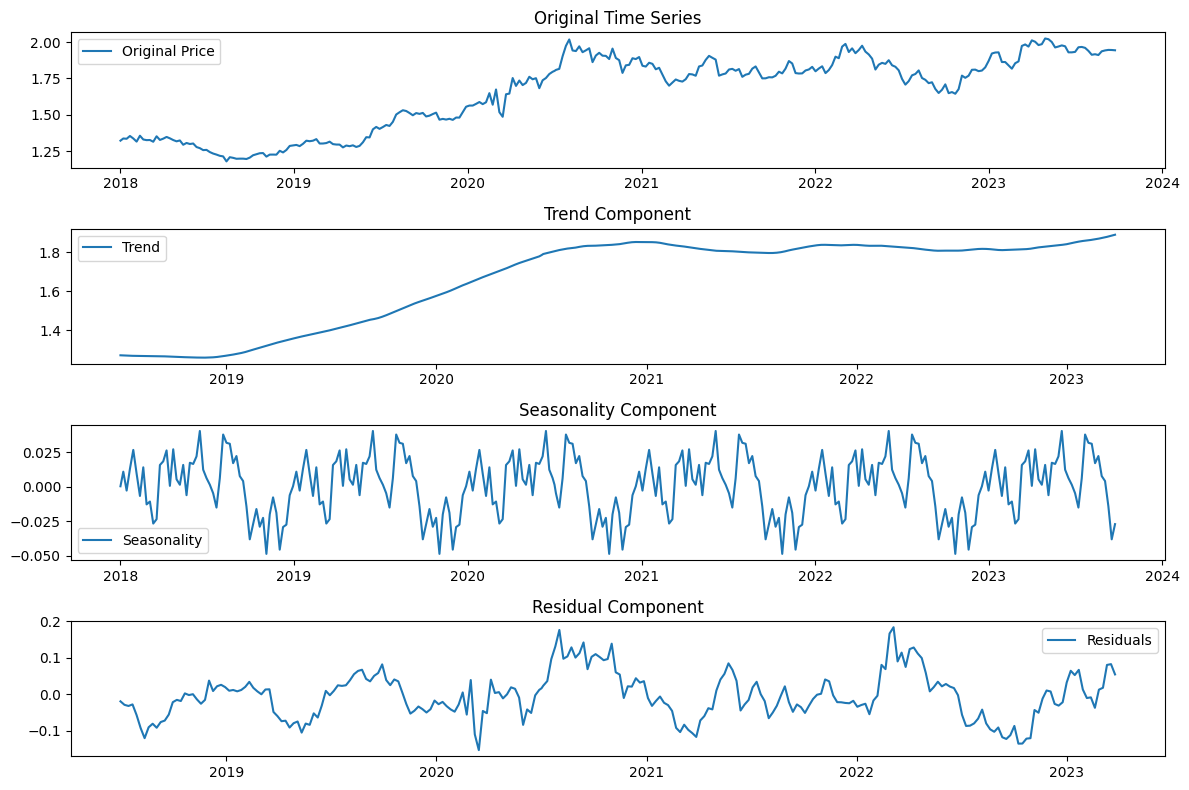

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
data = pd.read_csv('Gold.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.set_index('Date', inplace=True)
result = seasonal_decompose(data['Price'], model='additive', period=52)  # Assuming a weekly seasonality (52 weeks)
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Price'], label='Original Price')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [2]:
residuals = result.resid.dropna()  # Drop NaN values
residuals_df = pd.DataFrame({'Date': residuals.index, 'Residuals': residuals.values})
residuals_df.to_csv('residuals.csv', index=False)


Mean Squared Error (MSE): 0.0014
Mean Absolute Error (MAE): 0.0269
R-squared (R2): 0.6021


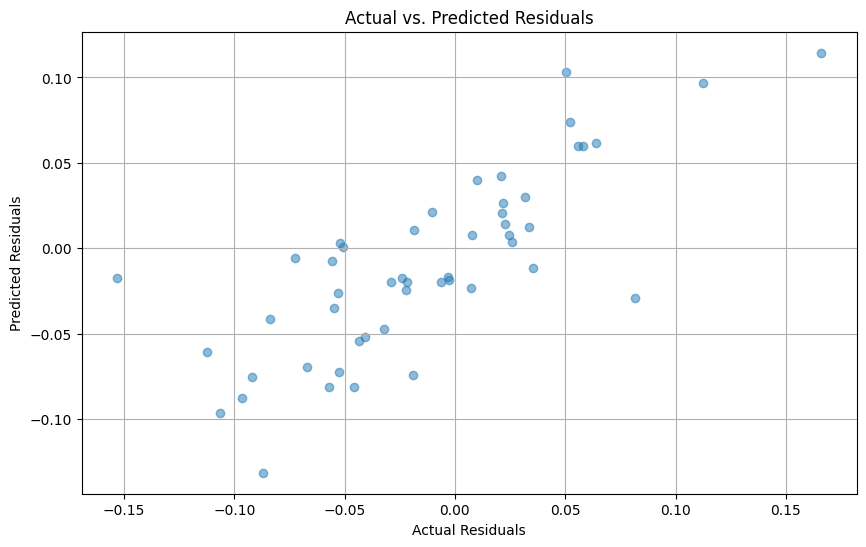

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Adding lagged residuals as features
num_lags = 1

for i in range(1, num_lags + 1):
    residuals_df[f'Residual_Lag_{i}'] = residuals_df['Residuals'].shift(i)

# Drop rows with NaN values
residuals_df.dropna(inplace=True)

# Define X (features) and y (target variable)
X = residuals_df[[f'Residual_Lag_{i}' for i in range(1, num_lags + 1)]]
y = residuals_df['Residuals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs. predicted residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Residuals')
plt.ylabel('Predicted Residuals')
plt.title('Actual vs. Predicted Residuals')
plt.grid(True)

# Display performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

# Optionally, you can save the plot to a file
# plt.savefig('residuals_prediction_plot.png')

plt.show()


Mean Squared Error (MSE): 0.0012
Mean Absolute Error (MAE): 0.0251
R-squared (R2): 0.6626


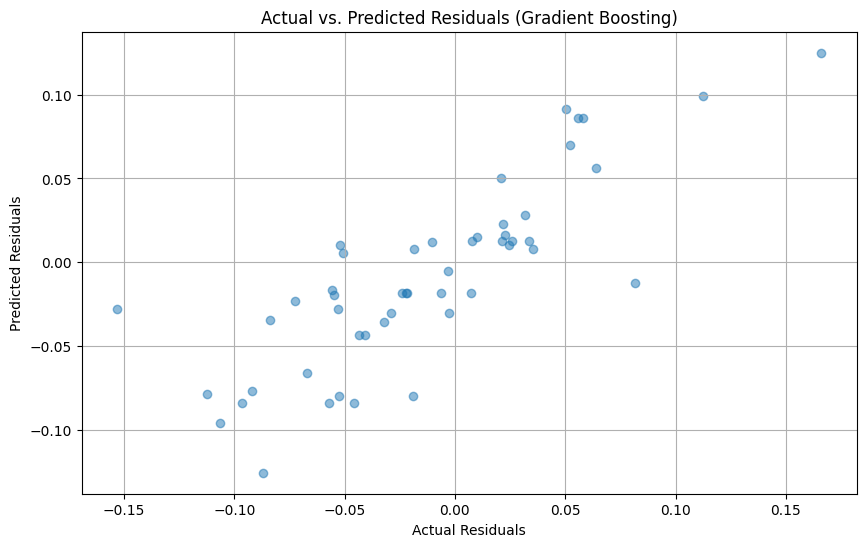

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Adding lagged residuals as features
num_lags = 1

for i in range(1, num_lags + 1):
    residuals_df[f'Residual_Lag_{i}'] = residuals_df['Residuals'].shift(i)

# Drop rows with NaN values
residuals_df.dropna(inplace=True)

# Define X (features) and y (target variable)
X = residuals_df[[f'Residual_Lag_{i}' for i in range(1, num_lags + 1)]]
y = residuals_df['Residuals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs. predicted residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Residuals')
plt.ylabel('Predicted Residuals')
plt.title('Actual vs. Predicted Residuals (Gradient Boosting)')
plt.grid(True)

# Display performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

# Optionally, you can save the plot to a file
# plt.savefig('residuals_prediction_plot_gb.png')

plt.show()


Best Hyperparameters: {'alpha': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Mean Squared Error (MSE): 0.0012
Mean Absolute Error (MAE): 0.0266
R-squared (R2): 0.6827


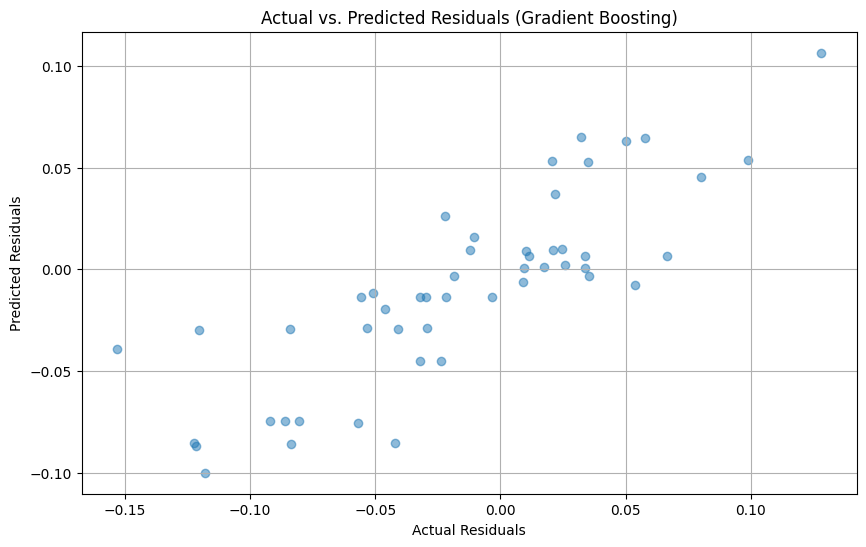

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Adding lagged residuals as features
num_lags = 3  # Increase the number of lagged features

for i in range(1, num_lags + 1):
    residuals_df[f'Residual_Lag_{i}'] = residuals_df['Residuals'].shift(i)

# Drop rows with NaN values
residuals_df.dropna(inplace=True)

# Define X (features) and y (target variable)
X = residuals_df[[f'Residual_Lag_{i}' for i in range(1, num_lags + 1)]]
y = residuals_df['Residuals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'alpha': [0.01, 0.1, 0.5],
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
y_pred = best_gb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs. predicted residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Residuals')
plt.ylabel('Predicted Residuals')
plt.title('Actual vs. Predicted Residuals (Gradient Boosting)')
plt.grid(True)

# Display performance metrics and best hyperparameters
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

plt.show()


Best Hyperparameters: {'alpha': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Mean Squared Error (MSE): 0.0012
Mean Absolute Error (MAE): 0.0266
R-squared (R2): 0.6827


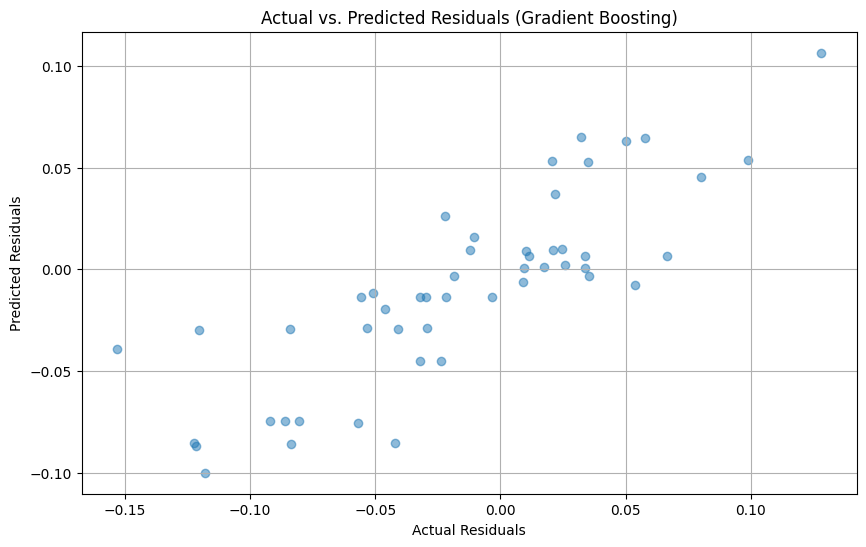

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Adding lagged residuals as features
num_lags = 3  # Increase the number of lagged features

for i in range(1, num_lags + 1):
    residuals_df[f'Residual_Lag_{i}'] = residuals_df['Residuals'].shift(i)

# Drop rows with NaN values
residuals_df.dropna(inplace=True)

# Define X (features) and y (target variable)
X = residuals_df[[f'Residual_Lag_{i}' for i in range(1, num_lags + 1)]]
y = residuals_df['Residuals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'alpha': [0.01, 0.1, 0.5],
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
y_pred = best_gb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs. predicted residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Residuals')
plt.ylabel('Predicted Residuals')
plt.title('Actual vs. Predicted Residuals (Gradient Boosting)')
plt.grid(True)

# Display performance metrics and best hyperparameters
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

plt.show()


In [8]:
!pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs705wpr/uk_wjb7s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs705wpr/ovoy59zk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31671', 'data', 'file=/tmp/tmpvs705wpr/uk_wjb7s.json', 'init=/tmp/tmpvs705wpr/ovoy59zk.json', 'output', 'file=/tmp/tmpvs705wpr/prophet_modelda_bed8z/prophet_model-20230927162242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


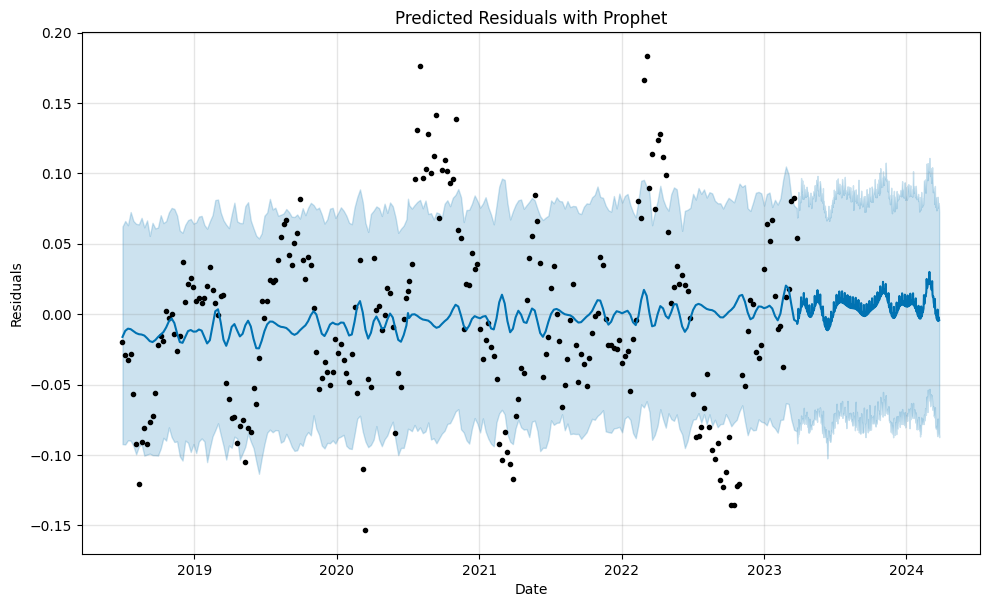

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Rename columns to match Prophet's requirements
residuals_df.rename(columns={'Date': 'ds', 'Residuals': 'y'}, inplace=True)

# Convert 'ds' column to datetime format
residuals_df['ds'] = pd.to_datetime(residuals_df['ds'])
# Create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(residuals_df)
# Create a dataframe with future dates
future = prophet_model.make_future_dataframe(periods=365)  # Extend predictions for 365 days

# Generate predictions
forecast = prophet_model.predict(future)
# Plot the predicted residuals
fig = prophet_model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Predicted Residuals with Prophet')
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs705wpr/hgj6atjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs705wpr/jscl11af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32576', 'data', 'file=/tmp/tmpvs705wpr/hgj6atjn.json', 'init=/tmp/tmpvs705wpr/jscl11af.json', 'output', 'file=/tmp/tmpvs705wpr/prophet_modelxaz_zyh3/prophet_model-20230927162438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


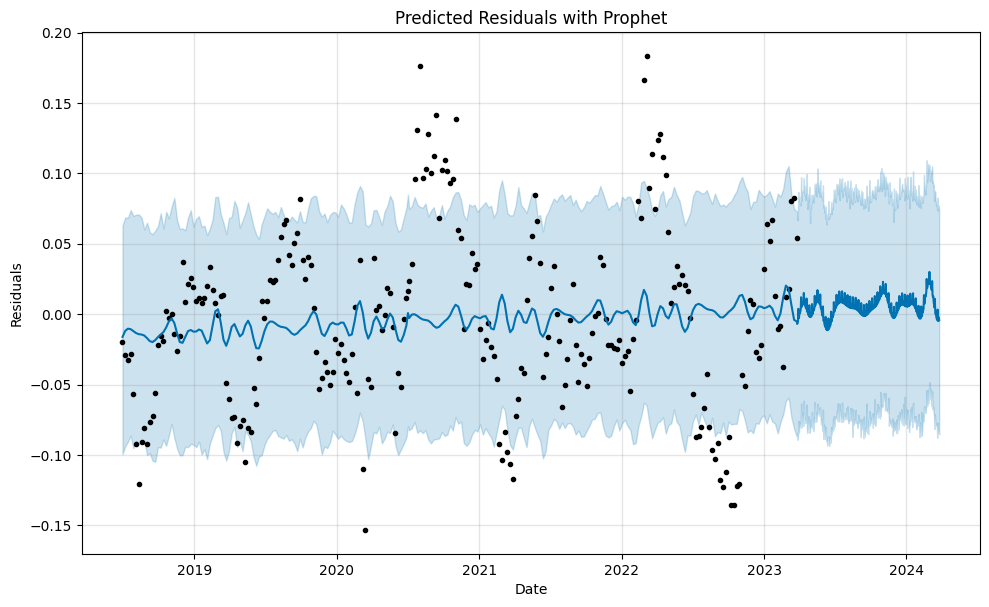

Mean Squared Error (MSE): 0.0042
Mean Absolute Error (MAE): 0.0512
R-squared (R2): -0.0651


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Rename columns to match Prophet's requirements
residuals_df.rename(columns={'Date': 'ds', 'Residuals': 'y'}, inplace=True)

# Convert 'ds' column to datetime format
residuals_df['ds'] = pd.to_datetime(residuals_df['ds'])

# Create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(residuals_df)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=365)  # Extend predictions for 365 days
forecast = prophet_model.predict(future)

# Extract actual residuals and predicted residuals
actual_residuals = residuals_df['y'].values
predicted_residuals = forecast['yhat'].tail(len(actual_residuals)).values

# Calculate performance metrics
mse = mean_squared_error(actual_residuals, predicted_residuals)
mae = mean_absolute_error(actual_residuals, predicted_residuals)
r2 = r2_score(actual_residuals, predicted_residuals)

# Plot the predicted residuals
fig = prophet_model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Predicted Residuals with Prophet')
plt.show()

# Print performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs705wpr/i1agy8p0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs705wpr/fkuv_wmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52178', 'data', 'file=/tmp/tmpvs705wpr/i1agy8p0.json', 'init=/tmp/tmpvs705wpr/fkuv_wmo.json', 'output', 'file=/tmp/tmpvs705wpr/prophet_modella7by7mb/prophet_model-20230927162605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


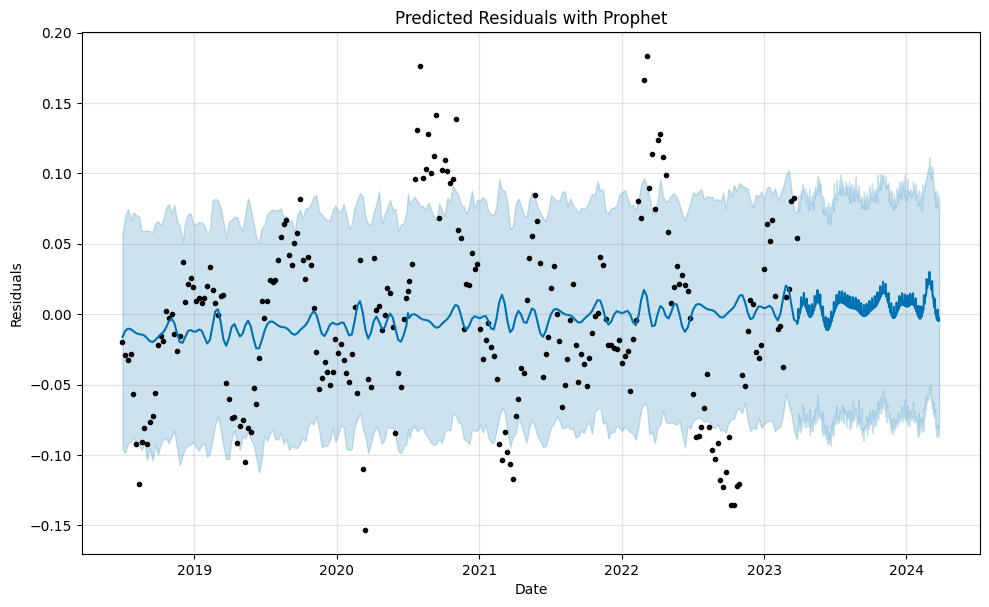

Mean Squared Error (MSE): 0.0042
Mean Absolute Error (MAE): 0.0512
R-squared (R2): -0.0651


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Rename columns to match Prophet's requirements
residuals_df.rename(columns={'Date': 'ds', 'Residuals': 'y'}, inplace=True)

# Convert 'ds' column to datetime format
residuals_df['ds'] = pd.to_datetime(residuals_df['ds'])

# Create and fit the Prophet model with adjusted hyperparameters
prophet_model = Prophet(
    changepoint_prior_scale=0.05,  # Adjust this parameter
    seasonality_prior_scale=10.0,  # Adjust this parameter
    holidays_prior_scale=10.0      # Adjust this parameter
)
prophet_model.fit(residuals_df)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=365)  # Extend predictions for 365 days
forecast = prophet_model.predict(future)

# Extract actual residuals and predicted residuals
actual_residuals = residuals_df['y'].values
predicted_residuals = forecast['yhat'].tail(len(actual_residuals)).values

# Calculate performance metrics
mse = mean_squared_error(actual_residuals, predicted_residuals)
mae = mean_absolute_error(actual_residuals, predicted_residuals)
r2 = r2_score(actual_residuals, predicted_residuals)

# Plot the predicted residuals
fig = prophet_model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Predicted Residuals with Prophet')
plt.show()

# Print performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')


Mean Squared Error (MSE): 0.0038
Mean Absolute Error (MAE): 0.0497
R-squared (R2): 0.0485


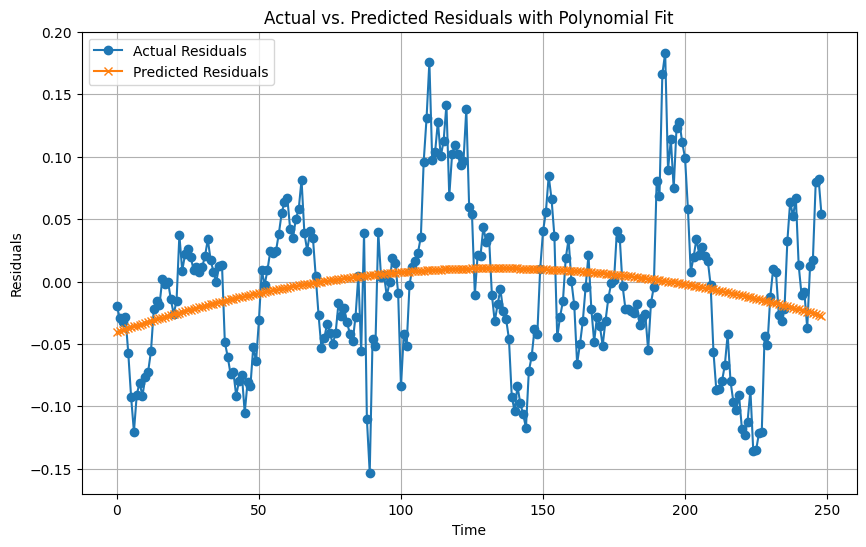

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Rename columns to match Prophet's requirements
residuals_df.rename(columns={'Date': 'ds', 'Residuals': 'y'}, inplace=True)

# Convert 'ds' column to datetime format
residuals_df['ds'] = pd.to_datetime(residuals_df['ds'])

# Sort the DataFrame by date (optional but recommended)
residuals_df.sort_values(by='ds', inplace=True)

# Extract actual residuals
actual_residuals = residuals_df['y'].values

# Fit a polynomial function (e.g., 2nd-degree polynomial)
degree = 2
coefficients = np.polyfit(range(len(actual_residuals)), actual_residuals, degree)
polynomial_func = np.poly1d(coefficients)

# Generate predicted residuals using the polynomial function
predicted_residuals = polynomial_func(range(len(actual_residuals)))

# Calculate performance metrics
mse = mean_squared_error(actual_residuals, predicted_residuals)
mae = mean_absolute_error(actual_residuals, predicted_residuals)
r2 = r2_score(actual_residuals, predicted_residuals)

# Plot the actual and predicted residuals
plt.figure(figsize=(10, 6))
plt.plot(actual_residuals, label='Actual Residuals', linestyle='-', marker='o')
plt.plot(predicted_residuals, label='Predicted Residuals', linestyle='-', marker='x')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Actual vs. Predicted Residuals with Polynomial Fit')
plt.legend()
plt.grid(True)

# Print performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

plt.show()


Mean Squared Error (MSE): 0.0020
Mean Absolute Error (MAE): 0.0365
R-squared (R2): 0.4925


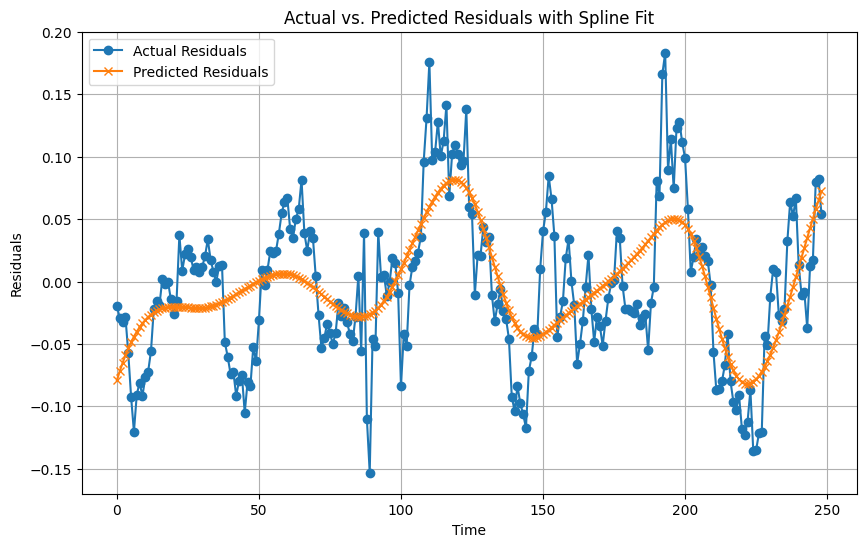

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.interpolate import UnivariateSpline

# Load the residuals data
residuals_df = pd.read_csv('residuals.csv')

# Rename columns to match Prophet's requirements
residuals_df.rename(columns={'Date': 'ds', 'Residuals': 'y'}, inplace=True)

# Convert 'ds' column to datetime format
residuals_df['ds'] = pd.to_datetime(residuals_df['ds'])

# Sort the DataFrame by date (optional but recommended)
residuals_df.sort_values(by='ds', inplace=True)

# Extract actual residuals
actual_residuals = residuals_df['y'].values

# Fit a spline to the residuals
spline = UnivariateSpline(range(len(actual_residuals)), actual_residuals, s=0.5)  # You can adjust the smoothing parameter (s) as needed

# Generate predicted residuals using the spline
predicted_residuals = spline(range(len(actual_residuals)))

# Calculate performance metrics
mse = mean_squared_error(actual_residuals, predicted_residuals)
mae = mean_absolute_error(actual_residuals, predicted_residuals)
r2 = r2_score(actual_residuals, predicted_residuals)

# Plot the actual and predicted residuals
plt.figure(figsize=(10, 6))
plt.plot(actual_residuals, label='Actual Residuals', linestyle='-', marker='o')
plt.plot(predicted_residuals, label='Predicted Residuals', linestyle='-', marker='x')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Actual vs. Predicted Residuals with Spline Fit')
plt.legend()
plt.grid(True)

# Print performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

plt.show()
